In [1]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2019-02-03 08:15:03--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.28.37
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.28.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  17.1MB/s    in 65s     

2019-02-03 08:16:09 (16.7 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [2]:
!unzip dogImages.zip

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg  
   creating: dogImages/test/002.Afghan_hound/
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_ho

In [0]:
import torch
import torch.nn as nn
import torchvision 
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import os
import PIL

In [0]:
from skimage import io

In [0]:

def getsize(img):
  return PIL.Image.open(img).size


In [7]:
DIR = 'dogImages/train/070.German_pinscher/'
for img in os.listdir(DIR):
  print(getsize(DIR+img))

(640, 480)
(640, 480)
(640, 427)
(514, 640)
(508, 640)
(638, 425)
(411, 479)
(524, 382)
(595, 535)
(332, 500)
(640, 480)
(630, 430)
(410, 498)
(428, 640)
(794, 456)
(318, 500)
(427, 640)
(638, 426)
(394, 623)
(637, 454)
(640, 480)
(640, 425)
(640, 428)
(425, 518)
(640, 480)
(425, 528)
(306, 395)
(428, 640)
(640, 480)
(640, 480)
(635, 516)
(637, 426)
(480, 640)
(640, 488)
(358, 360)
(540, 571)
(225, 225)
(879, 599)
(339, 495)
(752, 552)
(640, 428)
(414, 640)
(806, 656)
(635, 449)
(640, 583)
(428, 640)
(424, 609)


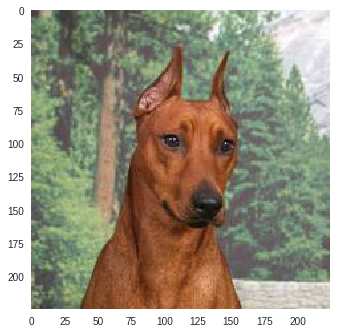

In [8]:
img  = io.imread('dogImages/train/070.German_pinscher/German_pinscher_04860.jpg')
plt.figure()
plt.imshow(img)
plt.grid(None)
plt.show()

In [0]:
data_names = ['train','test','valid']
data_transforms = {}
DIR = 'dogImages/'
datasets = {}
dataloaders = {}
batch_size = 32

for data_name in data_names:
  if data_name == 'train':
    augmentation = torchvision.transforms.Compose([
          torchvision.transforms.Resize((224,224)),
          torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
          torchvision.transforms.RandomHorizontalFlip(),
          torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
    ])
    data_transforms[data_name] = torchvision.transforms.Compose([
      augmentation,
      torchvision.transforms.Resize(256),
      torchvision.transforms.CenterCrop(224),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),

])

  else:
    data_transforms[data_name] = torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
  ])


In [10]:
data_transforms['train']

Compose(
    Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    ColorJitter(brightness=0, contrast=0, saturation=0.05, hue=0.05)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=(-20, 20), resample=2, expand=False)
)
    Resize(size=256, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [0]:
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(DIR, x),
                                          data_transforms[x])
                  for x in data_names}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True)
              for x in data_names}

In [40]:
next(iter(dataloaders['valid']))

[tensor([[[[ 0.7591,  0.5364,  0.3481,  ..., -0.0801,  0.3481,  0.2111],
           [ 0.5707,  0.8104,  0.4851,  ..., -0.1657,  0.2453,  0.1426],
           [-0.0287,  0.5193,  0.1768,  ..., -0.0629,  0.2624,  0.3309],
           ...,
           [-1.0048, -0.8335, -1.1247,  ...,  0.0569, -0.1143,  0.1597],
           [-0.9192, -0.7308, -1.0219,  ...,  0.0741,  0.2624,  0.1254],
           [-1.3130, -1.0219, -1.1932,  ...,  0.2111,  0.3652,  0.2111]],
 
          [[ 1.8683,  1.7633,  1.3957,  ...,  0.8004,  1.2206,  1.0630],
           [ 1.6057,  1.9909,  1.5532,  ...,  0.7304,  1.0980,  1.0105],
           [ 0.9755,  1.6057,  1.1856,  ...,  0.8354,  1.1331,  1.2031],
           ...,
           [-0.7752, -0.5651, -0.8627,  ...,  1.3081,  1.1155,  1.4307],
           [-0.6352, -0.4601, -0.7577,  ...,  1.2731,  1.4832,  1.3606],
           [-1.0028, -0.7577, -0.9328,  ...,  1.3782,  1.5182,  1.3782]],
 
          [[ 0.6182,  0.4439,  0.2348,  ..., -0.2881,  0.1999,  0.1128],
           [ 

In [12]:
classes_names = image_datasets['train'].classes
num_classes = len(classes_names)
num_classes

133

In [13]:
model = torchvision.models.vgg16(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 89161950.20it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
def imshow(img,title=None):
  img = img.numpy().transpose((1, 2, 0))
  std = [0.229, 0.224, 0.225]
  mean = [0.485, 0.456, 0.406]
  img = img * std + mean
  img = np.clip(img,0,1)
  plt.grid(None)
  plt.imshow(img)
  if title is not None:
    plt.title(title)
  plt.pause(0.001)

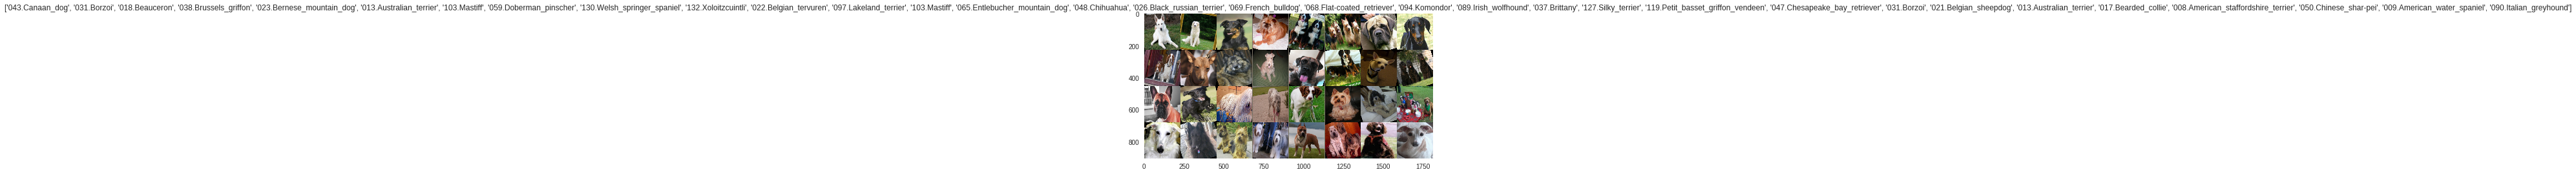

In [15]:
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out,[classes_names[c] for c in classes])


In [0]:
df = pd.DataFrame({'a':[1,2,3,4,5],'b':[10,-4,50,30,20]})

In [17]:
df

,a,b
0,1,10
1,2,-4
2,3,50
3,4,30
4,5,20


In [18]:
df.query('a>2')

,a,b
2,3,50
3,4,30
4,5,20


In [0]:
for param in model.parameters():
  param.require_grad = False
  
model.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)

In [0]:
device = 'cuda'

In [21]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
len_valid = len(dataloaders['valid'])


In [52]:
valid_loss = 8
print(f'\t Valid Loss: {valid_loss/len_valid :.3f}')

	 Valid Loss: 0.296


In [0]:
from tqdm import tqdm_notebook as tqdm
def train_model(model,epochs,criterion,optimizer,print_every=50):
  model.to(device)
  train_loss = 0
  valid_loss = 0
  steps = 0
  best_acc = 0
  for epoch in range(1,epochs+1):
    
    model.train()
    for images,labels in tqdm(dataloaders['train']):
      steps+=1
     
      images,labels = images.to(device),labels.to(device)
      optimizer.zero_grad()
      
      output = model.forward(images)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      
      train_loss+=loss.item() 
      
     
     
    
      if steps % print_every == 0:
        print(f'Epoch:{epoch}\t Batch: {steps}\t Train Loss:{train_loss/print_every :.3f}')
        corrects = 0
        accuracy = 0
        total = 0
        model.eval()
        with torch.no_grad():
          for images,labels in dataloaders['valid']:
            images,labels = images.to(device),labels.to(device)
            outputs = model.forward(images)
            loss = criterion(outputs,labels)
            valid_loss+=loss.item() 

            top_p,top_class = outputs.topk(1,dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
          
          
          print(f'\t Valid Loss: {valid_loss/len_valid :.3f}\t Test accuracy: {accuracy/len_valid :.3f}\n')
          valid_loss = 0
          train_loss = 0
          if best_acc < accuracy:
            best_acc = accuracy
            best_model_wts = model.state_dict()
            torch.save(model.state_dict(), 'checkpoint.pth')
      
    
    
          
        
    

In [54]:
len(dataloaders['valid'])

27

In [55]:
len(dataloaders['train'])

209

In [56]:
len(image_datasets['train'])

6680

In [0]:
import torch.optim as optim
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [28]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload
import PIL
PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

    100% |████████████████████████████████| 5.7MB 6.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [65]:
train_model(model,5,criterion,optimizer)

Epoch:1	 Batch: 50	 Train Loss:0.674
	 Valid Loss: 0.515	 Test accuracy: 0.840

Epoch:1	 Batch: 100	 Train Loss:0.474
	 Valid Loss: 0.481	 Test accuracy: 0.852

Epoch:1	 Batch: 150	 Train Loss:0.433
	 Valid Loss: 0.510	 Test accuracy: 0.825

Epoch:1	 Batch: 200	 Train Loss:0.487
	 Valid Loss: 0.465	 Test accuracy: 0.846



Epoch:2	 Batch: 250	 Train Loss:0.484
	 Valid Loss: 0.466	 Test accuracy: 0.838

Epoch:2	 Batch: 300	 Train Loss:0.369
	 Valid Loss: 0.459	 Test accuracy: 0.856

Epoch:2	 Batch: 350	 Train Loss:0.388
	 Valid Loss: 0.533	 Test accuracy: 0.850

Epoch:2	 Batch: 400	 Train Loss:0.361
	 Valid Loss: 0.424	 Test accuracy: 0.866



Epoch:3	 Batch: 450	 Train Loss:0.425
	 Valid Loss: 0.459	 Test accuracy: 0.862

Epoch:3	 Batch: 500	 Train Loss:0.264
	 Valid Loss: 0.458	 Test accuracy: 0.845

Epoch:3	 Batch: 550	 Train Loss:0.293
	 Valid Loss: 0.470	 Test accuracy: 0.851

Epoch:3	 Batch: 600	 Train Loss:0.305
	 Valid Loss: 0.434	 Test accuracy: 0.870



Epoch:4	 Batch: 650	 Train Loss:0.320
	 Valid Loss: 0.441	 Test accuracy: 0.861

Epoch:4	 Batch: 700	 Train Loss:0.209
	 Valid Loss: 0.542	 Test accuracy: 0.851

Epoch:4	 Batch: 750	 Train Loss:0.219
	 Valid Loss: 0.454	 Test accuracy: 0.860

Epoch:4	 Batch: 800	 Train Loss:0.252
	 Valid Loss: 0.398	 Test accuracy: 0.877



Epoch:5	 Batch: 850	 Train Loss:0.280
	 Valid Loss: 0.561	 Test accuracy: 0.848

Epoch:5	 Batch: 900	 Train Loss:0.205
	 Valid Loss: 0.435	 Test accuracy: 0.863

Epoch:5	 Batch: 950	 Train Loss:0.182
	 Valid Loss: 0.436	 Test accuracy: 0.862

Epoch:5	 Batch: 1000	 Train Loss:0.205
	 Valid Loss: 0.450	 Test accuracy: 0.855



In [66]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())


odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])


In [0]:
model.load_state_dict(state_dict)

In [0]:
with torch.no_grad():
  
  dataiter = next(iter(dataloaders['test']))
  images,labels = dataiter
  images,labels = images.to(device),labels.to(device)
  outputs = model.forward(images)

In [0]:
top_p,top_class = outputs.topk(1,dim=1)
equals = top_class == labels.view(*top_class.shape)

In [76]:
equals

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], device='cuda:0', dtype=torch.uint8)

In [78]:
torch.sum(equals.type(torch.FloatTensor)).item()

30.0

In [79]:
top_p

tensor([[21.0220],
        [25.9570],
        [17.4402],
        [24.0042],
        [25.5363],
        [19.2407],
        [20.5039],
        [15.7721],
        [13.5033],
        [14.0108],
        [24.0434],
        [ 7.8826],
        [24.7241],
        [17.5784],
        [14.1399],
        [16.5953],
        [12.5208],
        [18.4429],
        [27.8714],
        [14.8008],
        [20.0900],
        [21.5560],
        [18.5666],
        [22.6554],
        [27.3251],
        [28.7697],
        [17.8802],
        [22.9164],
        [26.7572],
        [20.8042],
        [31.5315],
        [29.6766]], device='cuda:0', grad_fn=<TopkBackward>)

In [0]:
ps = torch.exp(outputs)

In [101]:
outputs

tensor([[-5.4895,  9.5547, -3.7036,  ...,  1.7675, -4.5907, -2.8631],
        [-4.6889, -4.1353,  1.6724,  ..., -2.7824,  1.6400, -3.8849],
        [ 3.1784,  3.5493, -3.2018,  ..., -0.9430, -2.2282, -6.0878],
        ...,
        [-1.7290,  4.6558,  8.8681,  ...,  8.7807,  0.3678, -1.8414],
        [-2.4592, -1.0919, -2.2992,  ..., -0.3925,  0.3023, -2.9017],
        [ 2.3257,  3.2043, -1.6119,  ...,  1.4517, -2.9689,  1.9190]],
       device='cuda:0')

In [102]:
ps

tensor([[4.1301e-03, 1.4111e+04, 2.4634e-02,  ..., 5.8564e+00, 1.0146e-02,
         5.7091e-02],
        [9.1968e-03, 1.5997e-02, 5.3247e+00,  ..., 6.1893e-02, 5.1550e+00,
         2.0549e-02],
        [2.4008e+01, 3.4790e+01, 4.0689e-02,  ..., 3.8947e-01, 1.0772e-01,
         2.2704e-03],
        ...,
        [1.7746e-01, 1.0520e+02, 7.1017e+03,  ..., 6.5076e+03, 1.4446e+00,
         1.5860e-01],
        [8.5507e-02, 3.3557e-01, 1.0034e-01,  ..., 6.7534e-01, 1.3529e+00,
         5.4930e-02],
        [1.0234e+01, 2.4638e+01, 1.9951e-01,  ..., 4.2702e+00, 5.1362e-02,
         6.8142e+00]], device='cuda:0')

In [103]:
classes_names

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog',
 '011.Australian_cattle_dog',
 '012.Australian_shepherd',
 '013.Australian_terrier',
 '014.Basenji',
 '015.Basset_hound',
 '016.Beagle',
 '017.Bearded_collie',
 '018.Beauceron',
 '019.Bedlington_terrier',
 '020.Belgian_malinois',
 '021.Belgian_sheepdog',
 '022.Belgian_tervuren',
 '023.Bernese_mountain_dog',
 '024.Bichon_frise',
 '025.Black_and_tan_coonhound',
 '026.Black_russian_terrier',
 '027.Bloodhound',
 '028.Bluetick_coonhound',
 '029.Border_collie',
 '030.Border_terrier',
 '031.Borzoi',
 '032.Boston_terrier',
 '033.Bouvier_des_flandres',
 '034.Boxer',
 '035.Boykin_spaniel',
 '036.Briard',
 '037.Brittany',
 '038.Brussels_griffon',
 '039.Bull_terrier',
 '040.Bulldog',
 '041.Bullmastiff',
 '042.Cairn_terrier',
 '043.Canaan_do

In [104]:
top_class

tensor([[ 38],
        [  2],
        [115],
        [ 39],
        [  2],
        [126],
        [ 88],
        [ 55],
        [ 59],
        [ 16],
        [105],
        [ 31],
        [ 37],
        [ 11],
        [  6],
        [111],
        [127],
        [  3],
        [ 46],
        [ 84],
        [ 86],
        [ 34],
        [ 16],
        [ 61],
        [ 97],
        [ 44],
        [ 83],
        [ 49],
        [ 50],
        [  5],
        [114],
        [ 38]], device='cuda:0')

In [105]:
model.training

False

In [0]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            equals = preds == labels.view(*preds.shape)
            print(torch.sum(equals.type(torch.FloatTensor)).item())
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('Predicted: {},Actual: {}'.format(classes_names[preds[j]],classes_names[labels[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
                  
        model.train(mode=was_training)

31.0


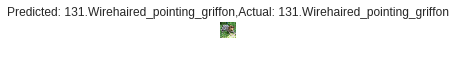

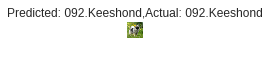

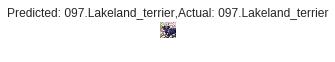

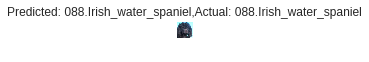

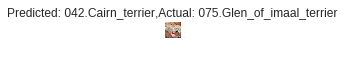

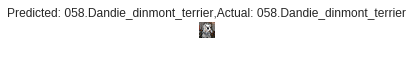

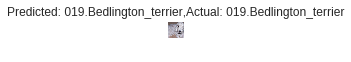

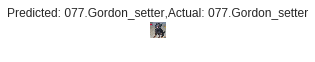

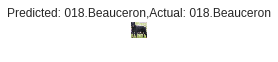

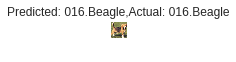

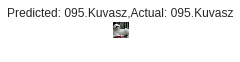

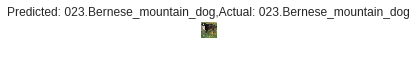

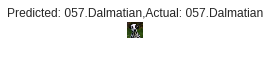

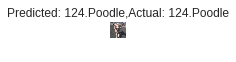

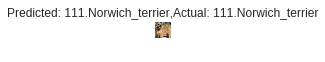

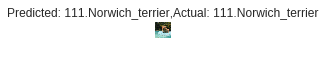

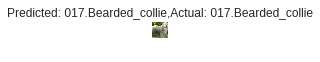

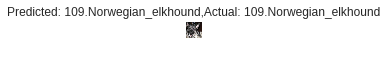

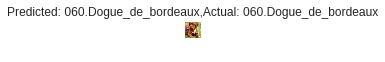

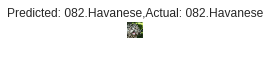

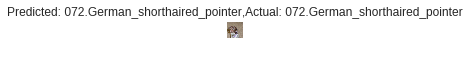

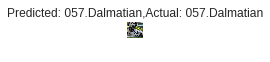

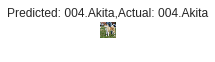

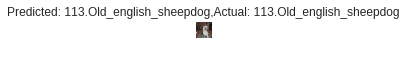

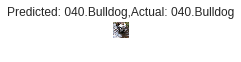

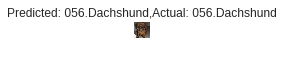

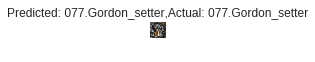

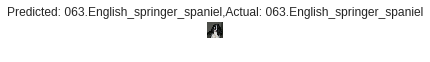

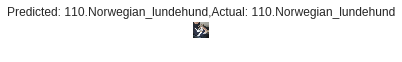

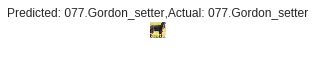

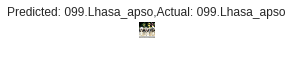

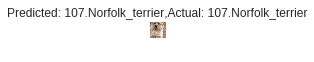

In [128]:
visualize_model(model,32)